In [71]:
#!pip install yellowbrick

In [419]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from yellowbrick.cluster import KElbowVisualizer

In [1624]:
df = pd.read_csv("./data/final_average_stats.csv")
df.drop(columns = ["Unnamed: 0", "#"], inplace = True)

In [1625]:
df.rename(columns = {"Pos": "POS", "Height": "HEIGHT", "Weight": "WEIGHT", "Age": "AGE"}, inplace = True)

In [1626]:
df['HEIGHT'] = df['HEIGHT'].str.replace('-','.')
df["HEIGHT"] = pd.to_numeric(df["HEIGHT"], downcast="float")
df["HEIGHT"] = df["HEIGHT"] * 0.3048

In [1627]:
df.head()

,PLAYER_NAME,Team,GP,MIN,FGM,FGA,FG%,3PM,3PA,3P%,...,zona8_attempted,zona8_made,zona9_attempted,zona9_made,zona10_attempted,zona10_made,zona11_attempted,zona11_made,zona12_attempted,zona12_made
0,A.J. Slaughter,GCN,22,24.3,5.0,10.2,0.484,1.7,4.2,0.402,...,32.0,13.0,16.0,7.0,8.0,5.0,5.0,4.0,3.0,1.0
1,Aaron Doornekamp,CAN,31,25.6,2.6,6.1,0.431,2.0,4.6,0.441,...,31.0,13.0,4.0,1.0,25.0,16.0,8.0,2.0,6.0,4.0
2,Aaron Jones,BBB,8,19.7,1.6,3.9,0.419,0.4,1.0,0.375,...,4.0,1.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
3,Achille Polonara,CAJ,33,26.5,4.2,8.8,0.479,1.4,4.1,0.341,...,39.0,12.0,7.0,3.0,14.0,3.0,5.0,3.0,2.0,1.0
4,Adam Hanga,FCB,31,16.1,2.2,3.7,0.578,1.1,2.0,0.541,...,19.0,9.0,2.0,2.0,6.0,3.0,2.0,1.0,5.0,1.0


In [1608]:
df.drop(columns = ["ORB","DRB","FGM", "FGA","3PM", "3PA","FTM", "FTA"], inplace = True)

In [1628]:
df.columns

Index(['PLAYER_NAME', 'Team', 'GP', 'MIN', 'FGM', 'FGA', 'FG%', '3PM', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'TOV', 'PF', 'ORB', 'DRB', 'REB', 'AST',
       'STL', 'BLK', 'PTS', 'POS', 'HEIGHT', 'WEIGHT', 'AGE',
       'zona1_attempted', 'zona1_made', 'zona2_attempted', 'zona2_made',
       'zona3_attempted', 'zona3_made', 'zona4_attempted', 'zona4_made',
       'zona5attempted', 'zona5_made', 'zona6_attempted', 'zona6_made',
       'zona7_attempted', 'zona7_made', 'zona8_attempted', 'zona8_made',
       'zona9_attempted', 'zona9_made', 'zona10_attempted', 'zona10_made',
       'zona11_attempted', 'zona11_made', 'zona12_attempted', 'zona12_made'],
      dtype='object')

In [1567]:
for i in range(1, 13):
    df[f"% ZONA{i}"] = df[f"zona{i}_made"] / df[f"zona{i}_attempted"]

KeyError: 'zona5_attempted'

In [1308]:
delete_list = []
for i in df.columns:
    if "zona" in i:
        delete_list.append(i)

In [1309]:
df.drop(columns = delete_list, inplace = True)

In [1629]:
df = df.loc[df["GP"] > 8]
df = df.loc[df["MIN"] > 10]

In [1300]:
for i in range(1, 13):
    df[f'% ZONA{i}'].fillna(df[f'% ZONA{i}'].mean(), inplace=True)

In [1630]:
df.fillna(0, inplace = True)

In [1631]:
df.drop_duplicates(subset = ["PLAYER_NAME"], inplace = True)

In [1252]:
triples = [1,3,5,8,10,12]
mid_range = [2,4,9,11]
paint = [6,7]
for i in triples:
    df[f"% ZONA{i}"] = df[f"% ZONA{i}"] * 1.5
    
for m in mid_range:
    df[f"% ZONA{m}"] = df[f"% ZONA{m}"] * 1
    
for p in paint:
    df[f"% ZONA{p}"] = df[f"% ZONA{p}"] * 0.5


In [1654]:
X = df.drop(columns = ["PLAYER_NAME", "Team", "GP", "POS", "WEIGHT", "AGE", "MIN"])

### Hasta aquí todo bien

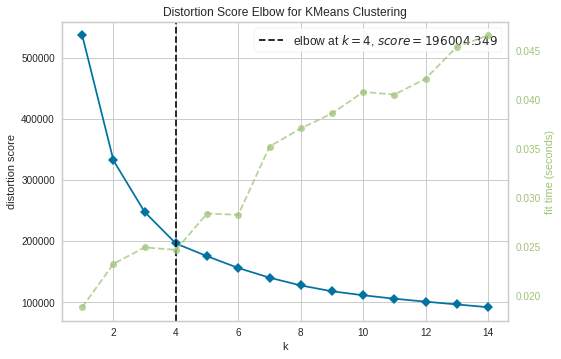

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [1690]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,15))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [1691]:
nClust = 4
km = KMeans(n_clusters=nClust, init='random', n_init=10, random_state=0)
y_km = km.fit_predict(X)



In [1692]:
y_km

array([1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 0, 2, 3, 1, 3, 2, 2, 2, 2, 1, 3,
       0, 1, 3, 2, 3, 1, 2, 2, 0, 3, 2, 1, 2, 2, 1, 0, 1, 1, 2, 3, 2, 1,
       1, 2, 2, 0, 2, 1, 2, 0, 3, 2, 0, 2, 0, 2, 2, 2, 3, 3, 3, 2, 2, 2,
       2, 2, 1, 3, 1, 1, 3, 2, 0, 3, 2, 2, 2, 2, 2, 1, 3, 3, 3, 3, 0, 2,
       1, 3, 0, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 3, 1, 1, 0, 2, 3,
       2, 1, 1, 1, 2, 3, 1, 1, 3, 2, 2, 0, 2, 1, 1, 1, 1, 2, 2, 2, 3, 0,
       3, 3, 3, 2, 0, 2, 3, 3, 2, 2, 3, 0, 0, 3, 3, 2, 1, 1, 3, 3, 3, 2,
       2, 3, 1, 3, 3, 2, 1, 2, 1, 2, 3, 3, 2, 2, 2, 3, 1, 2, 3, 3, 2, 2,
       2, 1, 2, 1, 0, 2, 2, 2, 1, 2, 3, 2, 2, 2, 3, 2, 1, 3, 2, 1, 2, 1,
       2, 3, 2, 2, 1, 2, 3, 2, 3, 3, 3, 2, 2, 2, 3, 2, 0, 1, 3, 2, 2, 2,
       2, 2, 3, 2, 3, 3, 3], dtype=int32)

In [1693]:
df['Cluster'] = y_km

In [1694]:
prueba = df[["PLAYER_NAME", "Cluster"]]

In [1695]:
cluster0 = df.loc[df["Cluster"] == 0]
list(cluster0.PLAYER_NAME)

['Aleksa Avramovic',
 'Ante Tomic',
 'Bojan Dubljevic',
 'Christian Eyenga',
 'Dario Brizuela',
 'Dejan Kravic',
 'Dino Radoncic',
 'Dylan Ennis',
 'Giorgi Shermadini',
 'James Feldeine',
 'Jasiel Rivero',
 'Jordan Davis',
 'Leonardo Meindl',
 'Marcelinho Huertas',
 'Melo Trimble',
 'Nemanja Radovic',
 'Nenad Dimitrijevic',
 'Scott Eatherton',
 'Viny Okouo']

In [1696]:
cluster0

,PLAYER_NAME,Team,GP,MIN,FGM,FGA,FG%,3PM,3PA,3P%,...,zona8_made,zona9_attempted,zona9_made,zona10_attempted,zona10_made,zona11_attempted,zona11_made,zona12_attempted,zona12_made,Cluster
14,Aleksa Avramovic,EST,35,29.7,5.7,13.0,0.437,1.4,4.3,0.322,...,13.0,12.0,4.0,10.0,4.0,7.0,4.0,9.0,3.0,0
28,Ante Tomic,JOV,34,23.0,5.2,9.6,0.545,0.0,0.1,0.200,...,1.0,5.0,4.0,0.0,0.0,6.0,1.0,0.0,0.0,0
39,Bojan Dubljevic,VAL,27,21.6,4.6,8.9,0.519,1.2,2.7,0.446,...,14.0,3.0,0.0,2.0,1.0,3.0,0.0,0.0,0.0,0
51,Christian Eyenga,MON,34,24.1,3.6,7.9,0.457,0.5,1.7,0.271,...,3.0,9.0,2.0,11.0,2.0,7.0,4.0,2.0,2.0,0
61,Dario Brizuela,UNI,32,23.9,5.5,11.8,0.464,1.8,4.9,0.357,...,12.0,24.0,11.0,17.0,7.0,4.0,1.0,5.0,1.0,0
65,Dejan Kravic,SPB,33,20.7,4.7,7.9,0.600,0.0,0.0,0.000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
68,Dino Radoncic,GBC,34,28.0,4.0,8.9,0.451,0.7,2.9,0.255,...,6.0,6.0,2.0,16.0,6.0,7.0,2.0,2.0,0.0,0
70,Dylan Ennis,ZAR,34,29.4,5.8,11.7,0.491,1.6,4.8,0.335,...,14.0,9.0,4.0,17.0,7.0,11.0,8.0,2.0,1.0,0
99,Giorgi Shermadini,CAN,34,23.5,6.2,9.3,0.667,0.0,0.0,0.000,...,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0
119,James Feldeine,BETIS,34,26.9,5.4,12.9,0.423,2.0,5.8,0.340,...,18.0,16.0,8.0,14.0,7.0,12.0,5.0,2.0,1.0,0


In [1697]:
cluster1 = df.loc[df["Cluster"] == 1]
list(cluster1.PLAYER_NAME)

['A.J. Slaughter',
 'Achille Polonara',
 'Alberto Abalde',
 'Alec Brown',
 'Alec Peters',
 'Alex Abrines',
 'Andrew Albicy',
 'Arnoldas Kulboka',
 'Axel Bouteille',
 'Bruno Fitipaldo',
 'Chris Czerapowicz',
 'Clevin Hannah',
 'Conner Frankamp',
 'D.J. Strawberry',
 'Dani Perez',
 'David Jelinek',
 'Ferran Bassas',
 'Francis Alonso',
 'Frankie Ferrari',
 'J.JJ Barea',
 'Jan Span',
 'Jaycee Carroll',
 'Jaylon Brown',
 'Jeremy Senglin',
 'John Jenkins',
 'John Roberson',
 'Johnny Dee',
 'Jonathan Rousselle',
 'Jonathan Tabu',
 'Kassius Robertson',
 'Ken Horton',
 'Klemen Prepelic',
 'Kyle Kuric',
 'Laurynas Beliauskas',
 'Luca Vildoza',
 'Lucas Faggiano',
 'Ludde Hakanson',
 'Makai Mason',
 'Nicolas Brussino',
 'Nicolas Laprovittola',
 'Omar Cook',
 'Pau Ribas',
 'Pere Tomas',
 'Robin Benzing',
 'Sam Van Rossom',
 'Sasu Salin',
 'Sergio Llull',
 'Stan Okoye',
 'T.J. Campbell',
 'Thaddus McFadden',
 'Tomas Dimsa',
 'Vitor Benite']

In [1698]:
cluster2 = df.loc[df["Cluster"] == 2]
list(cluster2.PLAYER_NAME)

['Aaron Doornekamp',
 'Adam Hanga',
 'Adam Waczynski',
 'Albert Oliver',
 'Albert Ventura',
 'Alberto Diaz',
 'Aleksandar Cvetkovic',
 'Alex Reyes',
 'Alex Suarez',
 'Alex Tyus',
 'Alvaro Munoz',
 'Artsiom Parakhouski',
 'Bandja Sy',
 'Beka Burjanadze',
 'Brandone Francis',
 'Carlos Alocen',
 'Carlos Suarez',
 'Conor Morgan',
 'D.J. Seeley',
 'Daniel Diez',
 'Daniel Garcia',
 'David DiLeo',
 'Deividas Dulkys',
 'Derrick Williams',
 'Dovydas Giedraitis',
 'Dzherom Rendl',
 'Edgar Vicedo',
 'Edwin Jackson',
 'Emir Sulejmanovic',
 'Eulis Baez',
 'Fabien Causeur',
 'Facundo Campazzo',
 'Fernando San Emeterio',
 'Gal Mekel',
 'Guillem Jou',
 'Guillem Vives',
 'Haukur Palsson',
 'Ilimane Diop',
 'Isaiah Taylor',
 'James Webb III',
 'Jason Thompson',
 'Javier Beiran',
 'Jeffery Taylor',
 'Jerome Jordan',
 'Joan Sastre',
 'Joel Parra',
 'John Shurna',
 'Jovan Novak',
 'Kartal Ozmizrak',
 'Kwan Cheatham, Jr.',
 'Leandro Bolmaro',
 'Leo Westermann',
 'Louis Labeyrie',
 'Malcolm Thomas',
 'Malik 

In [1699]:
cluster3 = df.loc[df["Cluster"] == 3]
list(cluster3.PLAYER_NAME)

['Alessandro Gentile',
 'Alex Renfroe',
 'Angel Delgado',
 'Artem Pustovyi',
 'Augusto Lima',
 'Brandon Davies',
 'Cory Higgins',
 'Deon Thompson',
 'Edy Tavares',
 'Elias Harris',
 'Emanuel Cate',
 'Fran Guerra',
 'Gabriel Deck',
 'Goran Huskic',
 'Jaime Echenique',
 'Jaime Fernandez',
 'Jake Cohen',
 'Jake Wiley',
 'Jaroslaw Zyskowski',
 'Jonathan Barreiro',
 'Juan Vaulet',
 'Kyle Alexander',
 'Laurynas Birutis',
 'Marc Garcia',
 'Martin Hermannsson',
 'Martynas Sajus',
 'Matt Costello',
 'Mike Daum',
 'Mike Tobey',
 'Nemanja Djurisic',
 'Nicholas Kay',
 'Nick Calathes',
 'Nikola Kalinic',
 'Nikola Mirotic',
 'Obi Emegano',
 'Oliver Stevic',
 'Ondrej Balvin',
 'Oriol Pauli',
 'Pierre Oriola',
 'Pierria Henry',
 'Regimantas Miniotas',
 'Rokas Giedraitis',
 'Rolands Smits',
 'Seth Hinrichs',
 'Simon Birgander',
 'Steven Enoch',
 'Tim Abromaitis',
 'Tonye Jekiri',
 'Tryggvi Hlinason',
 'B. Olumuyiwa',
 'Tyler Cavanaugh',
 'Victor Arteaga',
 'Vladimir Brodziansky',
 'Yakuba Ouattara',
 '

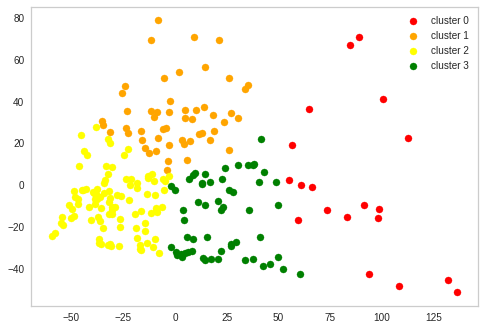

In [1700]:

# Visualization
# Apply PCA for dimensionality reduction
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

colormaps = ["red", "orange", "yellow", "green", "blue", "black", 'lightgreen','dodgerblue','navy','mediumpurple','pink','hotpink','oldlace','aqua','slategrey','palegreen','m','indianred','orchid']

for iCluster in range(0, nClust):
    plt.scatter(principalComponents[y_km == iCluster, 0], principalComponents[y_km == iCluster, 1], s=50, c=colormaps[iCluster],  label='cluster '+ str(iCluster))
plt.legend(scatterpoints=1,loc='best')
plt.grid()
plt.show()

In [1453]:
len(y_km)

223

In [1554]:
cluster0 = df.loc[df["Cluster"] == 0]
cluster0

,PLAYER_NAME,Team,GP,MIN,FGM,FGA,FG%,3PM,3PA,3P%,...,zona8_made,zona9_attempted,zona9_made,zona10_attempted,zona10_made,zona11_attempted,zona11_made,zona12_attempted,zona12_made,Cluster
0,A.J. Slaughter,GCN,22,24.3,5.0,10.2,0.484,1.7,4.2,0.402,...,13.0,16.0,7.0,8.0,5.0,5.0,4.0,3.0,1.0,0
3,Achille Polonara,CAJ,33,26.5,4.2,8.8,0.479,1.4,4.1,0.341,...,12.0,7.0,3.0,14.0,3.0,5.0,3.0,2.0,1.0,0
12,Alec Peters,CAJ,32,21.8,3.5,7.4,0.471,1.4,3.7,0.387,...,11.0,10.0,2.0,11.0,5.0,15.0,8.0,8.0,5.0,0
16,Alessandro Gentile,EST,17,24.6,4.9,11.5,0.431,0.4,1.7,0.207,...,2.0,11.0,6.0,4.0,2.0,15.0,5.0,0.0,0.0,0
20,Alex Renfroe,SPB,30,22.7,3.8,7.1,0.528,1.1,2.6,0.442,...,16.0,4.0,0.0,2.0,1.0,1.0,0.0,1.0,1.0,0
36,Axel Bouteille,UNI,30,20.4,4.1,9.3,0.437,1.5,4.2,0.368,...,15.0,16.0,5.0,12.0,3.0,29.0,11.0,1.0,1.0,0
44,Bruno Fitipaldo,CAN,33,23.1,3.6,8.8,0.414,1.3,4.0,0.333,...,13.0,16.0,4.0,9.0,1.0,6.0,1.0,2.0,1.0,0
52,Clevin Hannah,AND,34,25.0,4.1,8.9,0.459,1.9,4.6,0.410,...,27.0,10.0,4.0,9.0,5.0,7.0,5.0,2.0,1.0,0
53,Conner Frankamp,MUR,23,25.8,5.8,13.5,0.429,2.4,6.6,0.371,...,13.0,10.0,3.0,8.0,3.0,7.0,3.0,3.0,2.0,0
55,Cory Higgins,FCB,23,21.3,3.4,7.2,0.473,0.7,1.9,0.395,...,7.0,8.0,3.0,5.0,3.0,7.0,3.0,1.0,0.0,0


In [1555]:
cluster1 = df.loc[df["Cluster"] == 1]
cluster1

,PLAYER_NAME,Team,GP,MIN,FGM,FGA,FG%,3PM,3PA,3P%,...,zona8_made,zona9_attempted,zona9_made,zona10_attempted,zona10_made,zona11_attempted,zona11_made,zona12_attempted,zona12_made,Cluster
1,Aaron Doornekamp,CAN,31,25.6,2.6,6.1,0.431,2.0,4.6,0.441,...,13.0,4.0,1.0,25.0,16.0,8.0,2.0,6.0,4.0,1
4,Adam Hanga,FCB,31,16.1,2.2,3.7,0.578,1.1,2.0,0.541,...,9.0,2.0,2.0,6.0,3.0,2.0,1.0,5.0,1.0,1
5,Adam Waczynski,UNI,34,18.8,2.7,5.6,0.484,1.3,2.8,0.468,...,5.0,6.0,4.0,20.0,11.0,10.0,8.0,7.0,2.0,1
8,Albert Ventura,JOV,32,23.8,2.1,4.0,0.516,1.2,2.6,0.482,...,9.0,0.0,0.0,14.0,7.0,3.0,1.0,5.0,3.0,1
9,Alberto Abalde,RMB,30,19.3,2.3,5.2,0.442,1.1,2.4,0.438,...,11.0,1.0,1.0,2.0,1.0,6.0,3.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,Tomas Dimsa,GCN,30,21.3,2.5,7.2,0.347,1.2,4.0,0.298,...,9.0,0.0,0.0,21.0,6.0,2.0,1.0,2.0,2.0,1
257,Tomasz Gielo,AND,17,17.7,2.4,5.1,0.471,1.8,3.8,0.484,...,12.0,0.0,0.0,6.0,4.0,1.0,0.0,1.0,0.0,1
259,Trey Thompkins,RMB,27,20.6,3.4,6.7,0.514,1.3,3.0,0.425,...,7.0,8.0,8.0,7.0,4.0,17.0,5.0,2.0,1.0,1
265,Usman Garuba,RMB,34,18.8,2.1,4.7,0.459,0.6,1.9,0.318,...,1.0,1.0,0.0,15.0,4.0,3.0,0.0,6.0,3.0,1


In [1556]:
cluster2 = df.loc[df["Cluster"] == 2]
cluster2

,PLAYER_NAME,Team,GP,MIN,FGM,FGA,FG%,3PM,3PA,3P%,...,zona8_made,zona9_attempted,zona9_made,zona10_attempted,zona10_made,zona11_attempted,zona11_made,zona12_attempted,zona12_made,Cluster
14,Aleksa Avramovic,EST,35,29.7,5.7,13.0,0.437,1.4,4.3,0.322,...,13.0,12.0,4.0,10.0,4.0,7.0,4.0,9.0,3.0,2
28,Ante Tomic,JOV,34,23.0,5.2,9.6,0.545,0.0,0.1,0.200,...,1.0,5.0,4.0,0.0,0.0,6.0,1.0,0.0,0.0,2
39,Bojan Dubljevic,VAL,27,21.6,4.6,8.9,0.519,1.2,2.7,0.446,...,14.0,3.0,0.0,2.0,1.0,3.0,0.0,0.0,0.0,2
51,Christian Eyenga,MON,34,24.1,3.6,7.9,0.457,0.5,1.7,0.271,...,3.0,9.0,2.0,11.0,2.0,7.0,4.0,2.0,2.0,2
65,Dejan Kravic,SPB,33,20.7,4.7,7.9,0.600,0.0,0.0,0.000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
68,Dino Radoncic,GBC,34,28.0,4.0,8.9,0.451,0.7,2.9,0.255,...,6.0,6.0,2.0,16.0,6.0,7.0,2.0,2.0,0.0,2
70,Dylan Ennis,ZAR,34,29.4,5.8,11.7,0.491,1.6,4.8,0.335,...,14.0,9.0,4.0,17.0,7.0,11.0,8.0,2.0,1.0,2
99,Giorgi Shermadini,CAN,34,23.5,6.2,9.3,0.667,0.0,0.0,0.000,...,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2
119,James Feldeine,BETIS,34,26.9,5.4,12.9,0.423,2.0,5.8,0.340,...,18.0,16.0,8.0,14.0,7.0,12.0,5.0,2.0,1.0,2
123,Jasiel Rivero,SPB,31,23.4,4.6,8.1,0.576,0.5,1.9,0.283,...,5.0,2.0,1.0,5.0,2.0,4.0,2.0,0.0,0.0,2


In [1557]:
cluster4 = df.loc[df["Cluster"] == 4]
cluster4

,PLAYER_NAME,Team,GP,MIN,FGM,FGA,FG%,3PM,3PA,3P%,...,zona8_made,zona9_attempted,zona9_made,zona10_attempted,zona10_made,zona11_attempted,zona11_made,zona12_attempted,zona12_made,Cluster
7,Albert Oliver,OBR,31,15.1,1.1,2.5,0.418,0.5,1.3,0.390,...,5.0,3.0,2.0,3.0,1.0,0.0,0.0,1.0,1.0,4
15,Aleksandar Cvetkovic,EST,27,15.2,1.4,2.9,0.494,0.8,2.0,0.415,...,7.0,1.0,0.0,5.0,3.0,2.0,0.0,3.0,1.0,4
21,Alex Reyes,BBB,32,12.0,1.4,3.3,0.425,0.7,2.0,0.349,...,7.0,7.0,4.0,3.0,0.0,5.0,1.0,4.0,0.0,4
22,Alex Suarez,OBR,30,16.3,1.5,3.1,0.500,0.7,1.8,0.396,...,7.0,5.0,4.0,6.0,2.0,4.0,3.0,2.0,1.0,4
23,Alex Tyus,RMB,16,14.0,2.2,3.9,0.571,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,William Magarity,GBC,29,14.8,1.9,4.8,0.386,0.8,2.6,0.293,...,6.0,10.0,4.0,10.0,4.0,6.0,1.0,1.0,0.0,4
274,Xabi Oroz,GBC,31,18.8,1.3,2.9,0.451,0.4,1.0,0.433,...,3.0,2.0,0.0,6.0,4.0,0.0,0.0,0.0,0.0,4
275,Xabier Lopez-Arostegui,JOV,24,25.4,4.0,8.2,0.487,1.7,4.0,0.412,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
276,Xavi Rabaseda,SPB,29,19.9,1.8,4.1,0.433,0.7,2.2,0.312,...,1.0,0.0,0.0,13.0,5.0,6.0,3.0,7.0,4.0,4


### BOXPLOTS

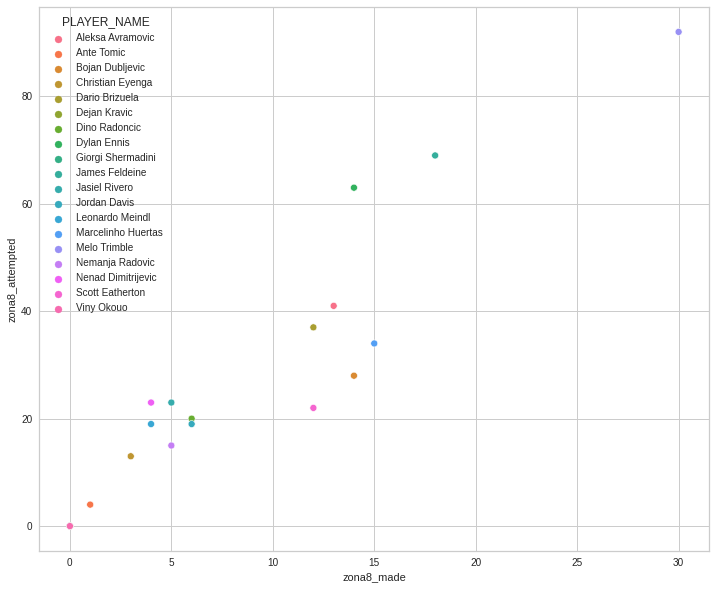

In [1676]:
plt.figure(figsize = (12,10))
sns.scatterplot(data=cluster0, x="zona8_made", y="zona8_attempted", hue = "PLAYER_NAME")
plt.show()

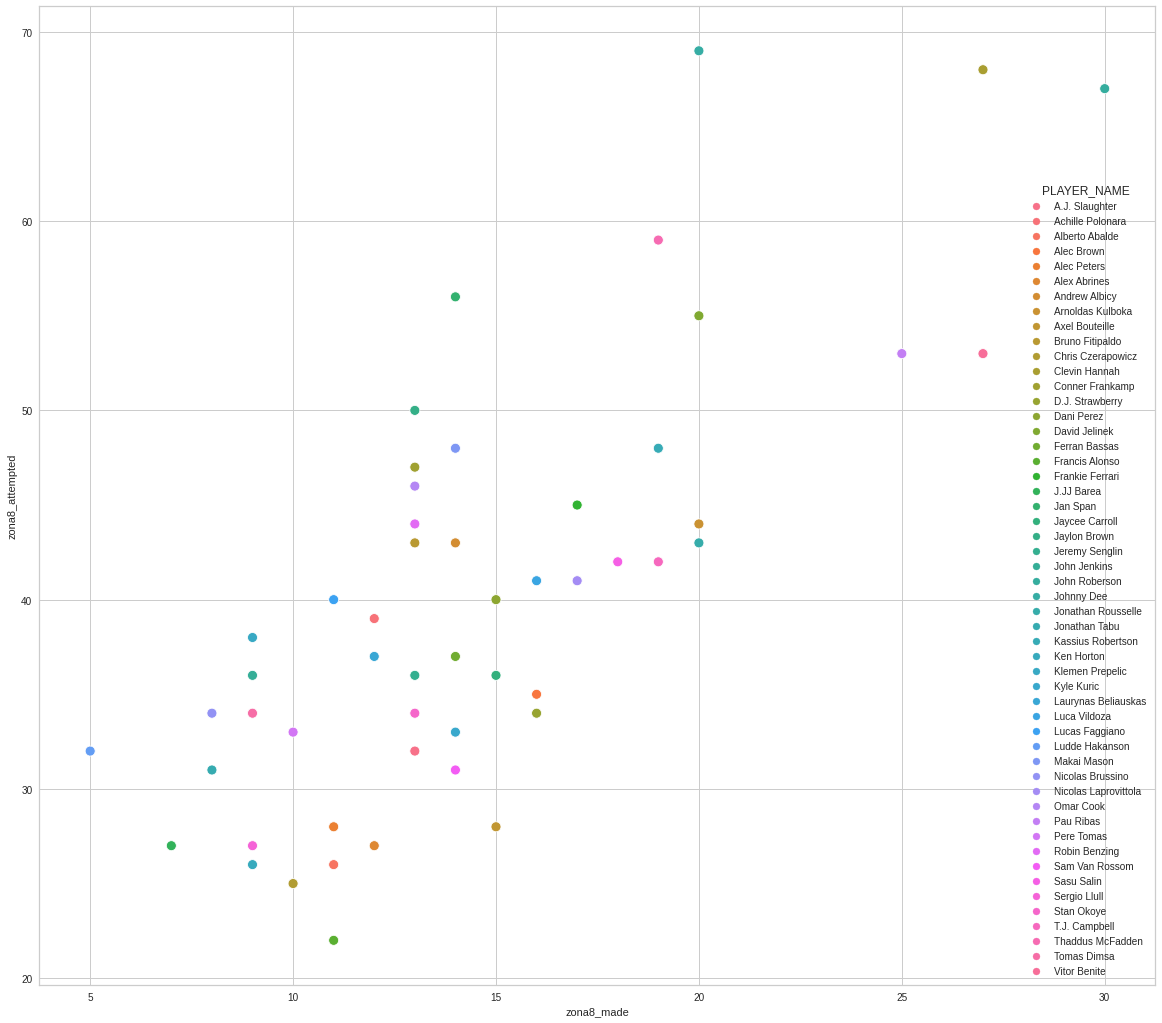

In [1687]:
plt.figure(figsize = (20,18))
sns.scatterplot(data=cluster1, x="zona8_made", y="zona8_attempted", hue = "PLAYER_NAME", s = 100)
plt.show()

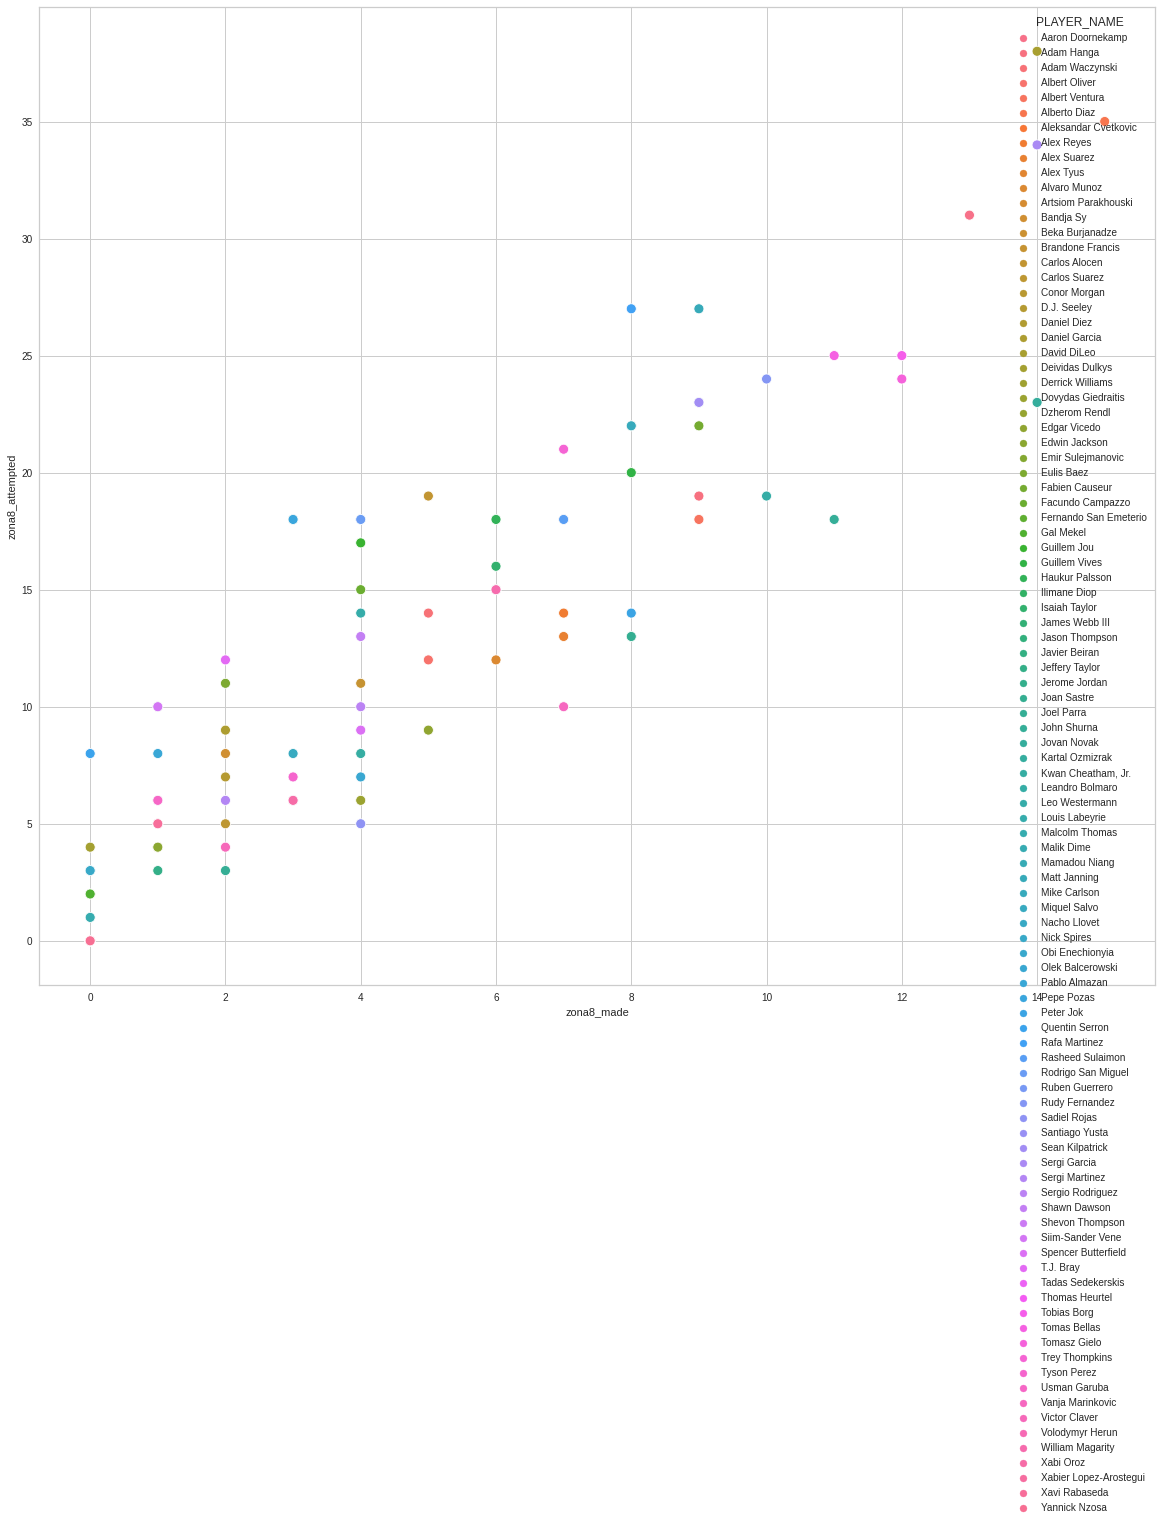

In [1688]:
plt.figure(figsize = (20,18))
sns.scatterplot(data=cluster2, x="zona8_made", y="zona8_attempted", hue = "PLAYER_NAME", s = 100)
plt.show()

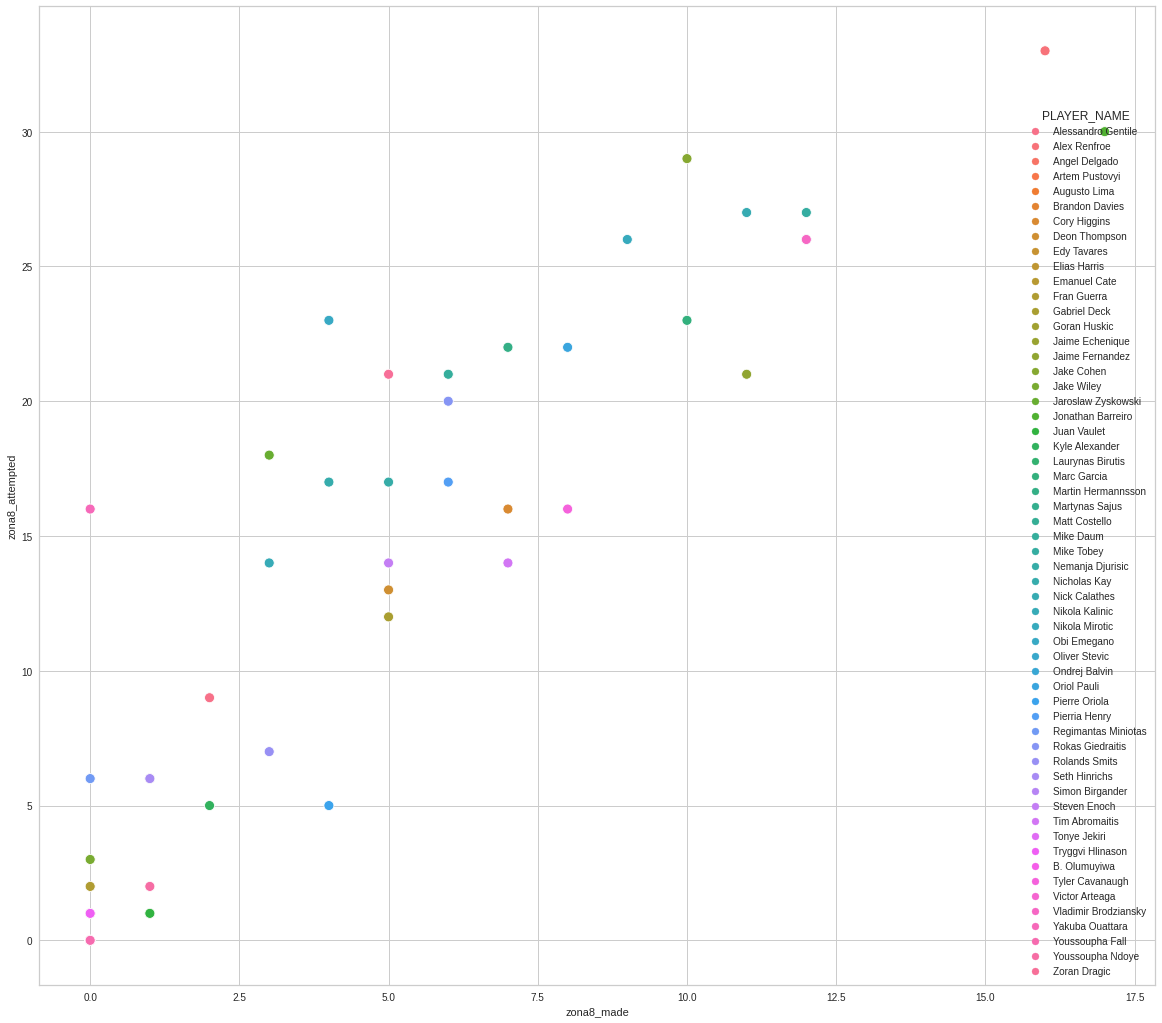

In [1689]:
plt.figure(figsize = (20,18))
sns.scatterplot(data=cluster3, x="zona8_made", y="zona8_attempted", hue = "PLAYER_NAME", s = 100)
plt.show()